<a href="https://colab.research.google.com/github/andreiamferreira/image-processing-course/blob/morfologia_matematica/Morfologia_matem%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORFOLOGIA MATEMÁTICA

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL.Image as Image
plt.style.use("dark_background")

Mounted at /content/gdrive


In [25]:
!python --version

Python 3.10.12


## Importando a imagem para erosão

valor maximo de pixel da imagem original =  255 , e valor maximo de pixel da imagem normalizada =  1.0


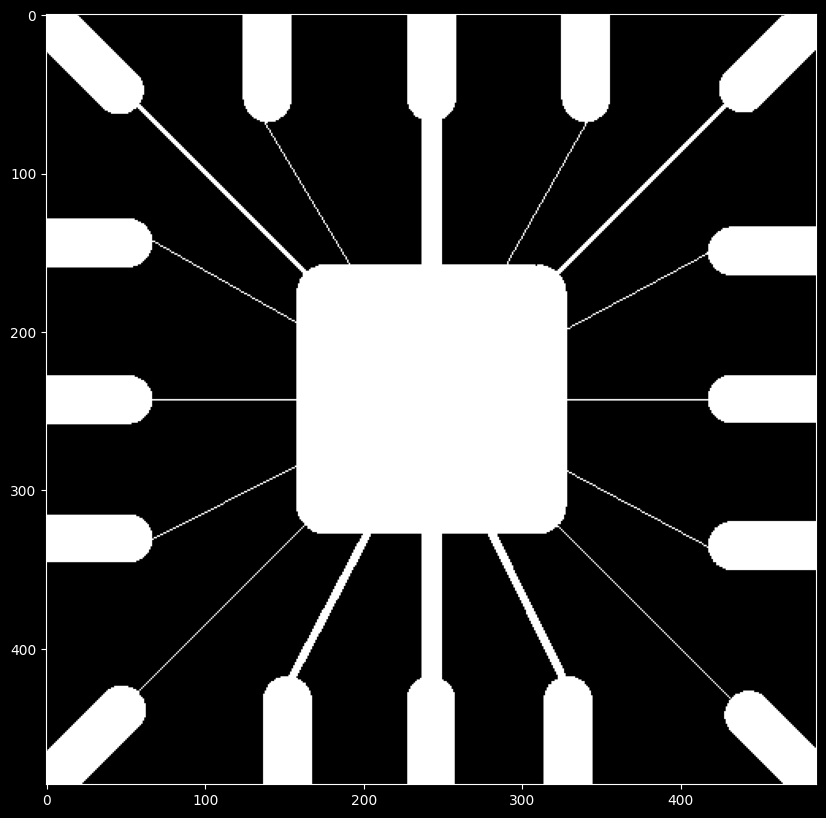

In [28]:
# IMPORTAR A IMAGEM
img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Morfologia Matematica/Fig0905(a)(wirebond-mask).tif')

img_array = np.array(img)
# NORMALIZAR A IMAGEM
img_n = (img_array - img_array.min())/(img_array.max()-img_array.min())
# img_n = (img_array - np.amin(img_array)) / (np.amax(img_array) - np.amin(img_array))

print("valor maximo de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys");

# EROSAO

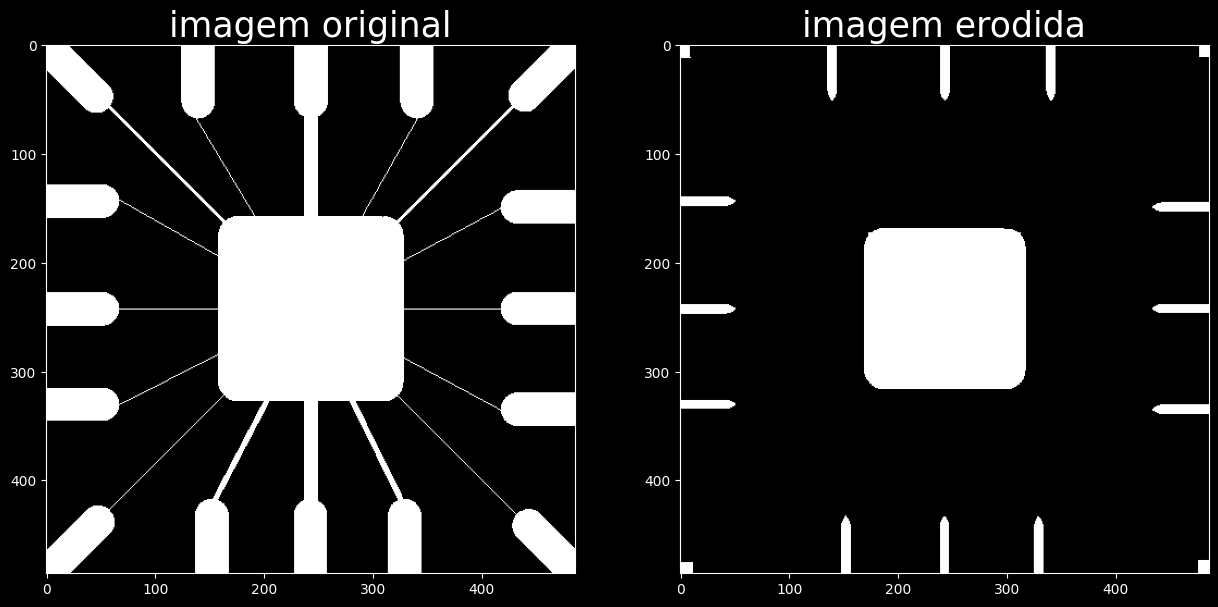

In [29]:
# KERNEL (k)
N = 23
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode = cv2.erode(img_n, KQ)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25);

# DILATAÇAO

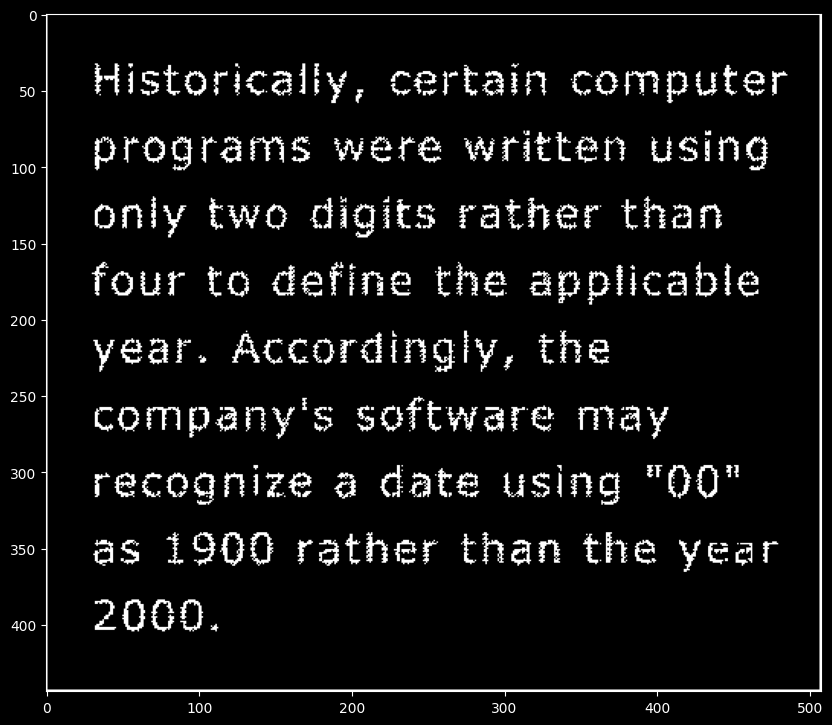

In [30]:
# IMPORTAR A IMAGEM
img_2 = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Morfologia Matematica/Fig0907(a)(text_gaps_1_and_2_pixels).tif')

img_array_2 = np.array(img_2)
# NORMALIZAR A IMAGEM
img_n2 = (img_array_2 - img_array_2.min())/(img_array_2.max()-img_array_2.min())

# NORMALIZAR A IMAGEM

plt.figure(figsize=(10,10))
plt.imshow(img_2, cmap="Greys");

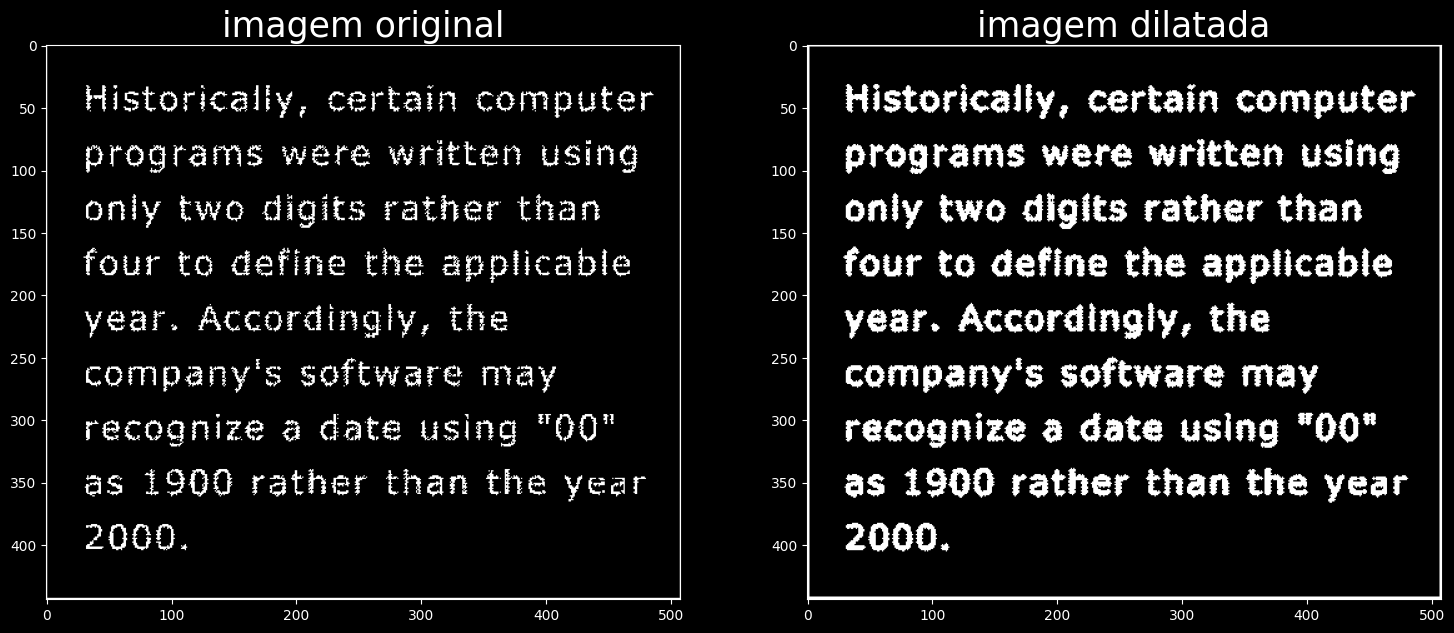

In [31]:
# KERNEL (k)
N = 3
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KC # escolha da mascara

dilate = cv2.dilate(img_n2, KQ, iterations=1)

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img_n2, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);

# Bordas internas, externas e gradiente morfológico

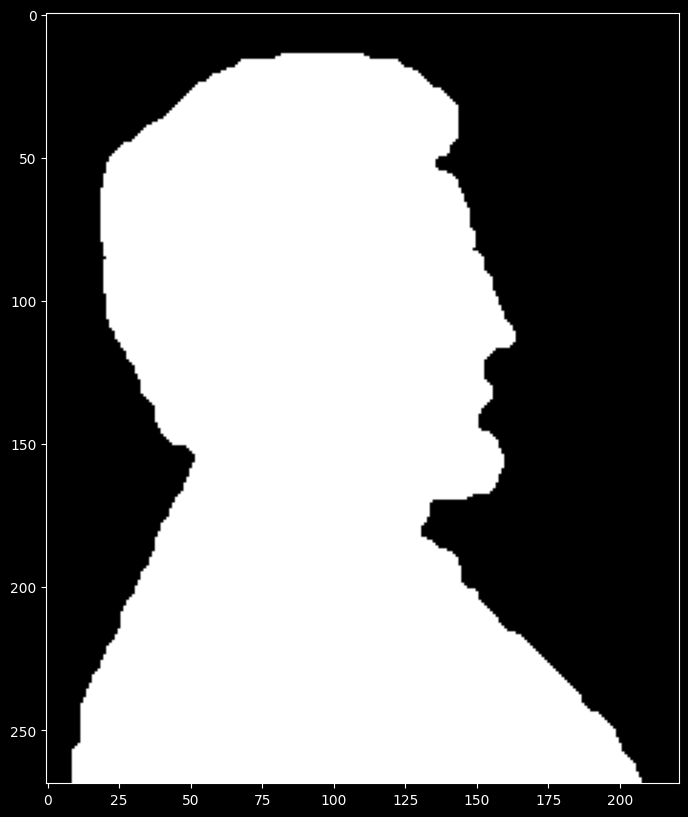

In [33]:
# IMPORTAR A IMAGEM
img3 = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Morfologia Matematica/Fig0914(a)(licoln from penny).tif')
img3_array = np.array(img3)
# NORMALIZAR A IMAGEM
img_n3 = (img3_array - img3_array.min())/(img3_array.max()-img3_array.min())

plt.figure(figsize=(10,10))
plt.imshow(img_n3, cmap="Greys");

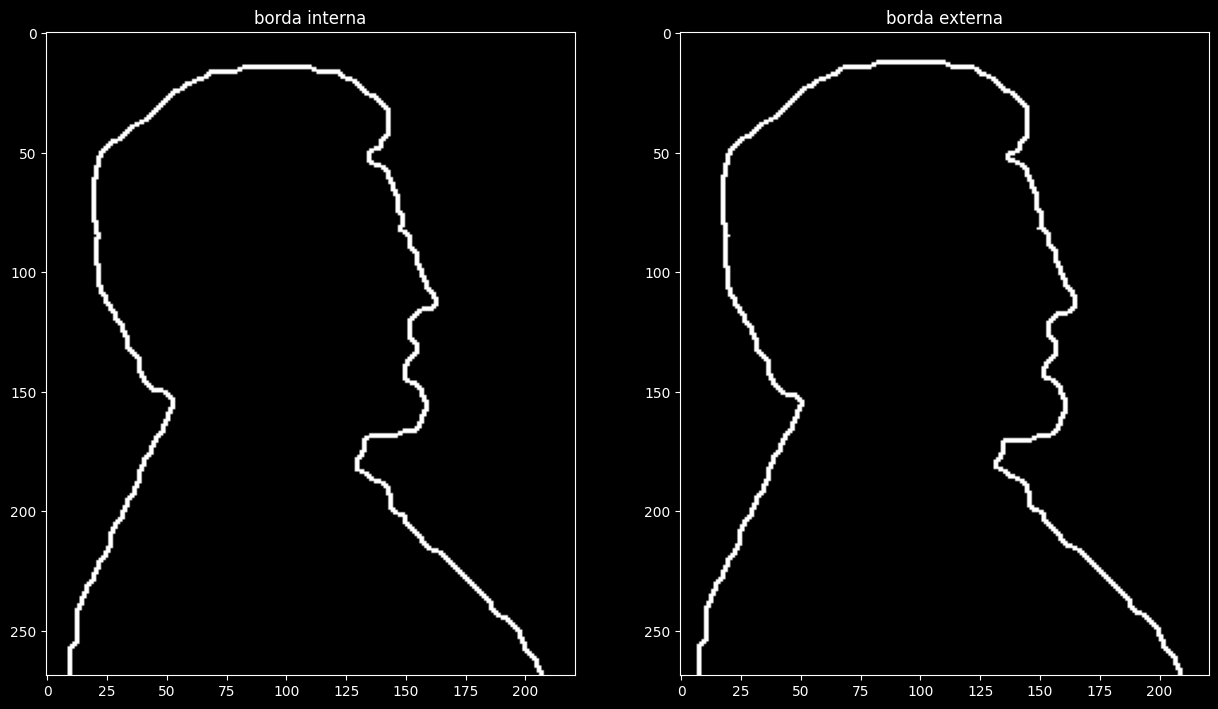

In [34]:
# Bordas internas e Externas
# KERNEL (k)
N = 5
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

# borda interna com a funçao pronta
interna = img_n3  - cv2.erode(img_n3, KQ);


#borda externa pronta
externa = cv2.dilate(img_n3, KQ) - img_n3;

plt.figure(figsize = (15,10));
plt.subplot(1,2,1);plt.imshow(interna, cmap='gray');plt.title('borda interna');
plt.subplot(1,2,2);plt.imshow(externa, cmap='gray');plt.title('borda externa');


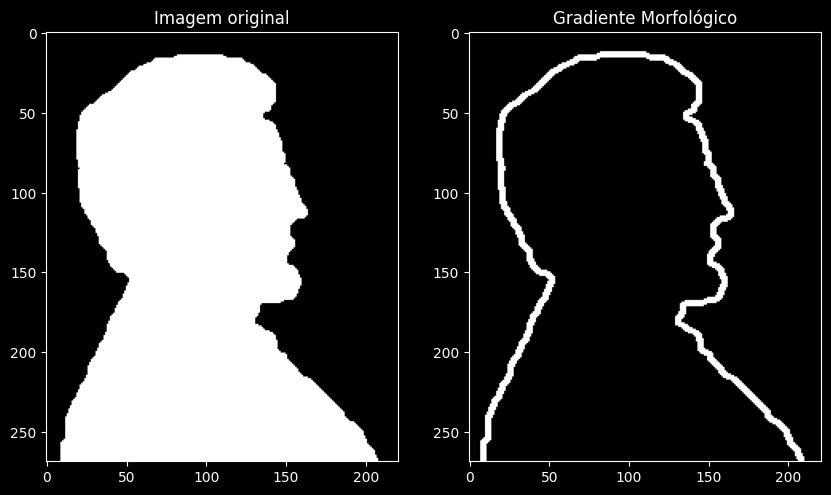

In [35]:
# Gradiente Morfológico

gm = cv2.dilate(img_n3,KQ) - cv2.erode(img_n3,KQ);

plt.figure(figsize = (10,10));
plt.subplot(1,2,1);plt.imshow(img_n3, cmap='gray');plt.title('Imagem original');
plt.subplot(1,2,2);plt.imshow(gm, cmap='gray');plt.title('Gradiente Morfológico');